# MAT 381E Homework 2

## Question 1

For this question we are going to use [an NBA dataset](https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/). 

1. Get the data from the season 2018-2019 as a pandas dataframe. Explain each column in the dataset.
2. Write a function that takes the `GAME_ID` as the parameter and returns the full dataset for a given match. Test your function on 5 random matches.
3. Write a function that takes the `GAME_ID` as the parameter and returns a dictionary of (key,value) pairs where key is a player name and value is how many times that specific player appears in `PLAYER1_NAME`,`PLAYER2_NAME`, or `PLAYER3_NAME` columns.
4. Plot the results of Step 3 as a bar chart sorted from the most active player to the least active player for 5 random games.
3. Write a function that takes the `GAME_ID` as the parameter and returns a list of pairs of player names where the pair interacted during the game more than once. Test your function on 5 random matches.

In [2]:
import pandas as pd
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt
import json
import random
import operator
import networkx as nx
import collections

In [3]:
#QUESTION 1
#1
nba_data = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')

In [4]:
#2
#df_bygameid() is a function that takes the GAME_ID as a parameter and returns the full dataset for a given match.
def df_bygameid(id):
    df = nba_data
    return df[df.GAME_ID == id]

In [5]:
ids = 5*[0]
ids = [random.randint(21800001,21801230) for item in ids]
random_games = []
for item in ids:
    random_games.append(df_bygameid(item))

In [6]:
random_games[0].head()

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
27474,0,0,12,2,21800798,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7:11 PM
27475,1,0,10,4,21800798,Jump Ball Turner vs. Zubac: Tip to James,NaN,12:00,1,4.0,...,2544,LeBron James,LAL,Los Angeles,1.610613e+09,Lakers,NaN,NaN,NaN,7:11 PM
27476,2,75,2,7,21800798,NaN,NaN,11:46,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Rondo 4' Driving Finger Roll Layup,7:11 PM
27477,3,0,4,8,21800798,Collison REBOUND (Off:0 Def:1),NaN,11:42,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7:11 PM
27478,4,98,1,9,21800798,Bogdanovic 2' Cutting Layup Shot (2 PTS) (Youn...,NaN,11:31,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,0 - 2,2,NaN,7:12 PM


In [7]:
random_games[1].head()

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
262534,0,0,12,2,21800888,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7:44 PM
262535,1,0,10,4,21800888,Jump Ball Whiteside vs. Drummond: Tip to Jackson,NaN,12:00,1,4.0,...,202704,Reggie Jackson,DET,Detroit,1.610613e+09,Pistons,NaN,NaN,NaN,7:44 PM
262536,2,58,1,7,21800888,NaN,NaN,11:33,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Griffin 7' Turnaround Hook Shot (2 PTS),7:44 PM
262537,3,47,2,8,21800888,MISS McGruder 10' Turnaround Jump Shot,NaN,11:17,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7:45 PM
262538,4,0,4,9,21800888,NaN,NaN,11:14,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drummond REBOUND (Off:0 Def:1),7:45 PM


In [8]:
random_games[3].head()

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
60622,0,0,12,2,21800150,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:41 PM
60623,1,0,10,4,21800150,Jump Ball Jordan vs. Howard: Tip to Doncic,NaN,12:00,1,4.0,...,1629029,Luka Doncic,DAL,Dallas,1.610613e+09,Mavericks,NaN,NaN,NaN,8:41 PM
60624,2,1,1,7,21800150,Barnes 25' 3PT Jump Shot (3 PTS) (Doncic 1 AST),NaN,11:45,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,0 - 3,3,NaN,8:41 PM
60625,3,1,2,9,21800150,NaN,NaN,11:23,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Mark Morris 25' 3PT Jump Shot,8:42 PM
60626,4,0,4,10,21800150,Barnes REBOUND (Off:0 Def:1),NaN,11:20,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:42 PM


In [9]:
random_games[4].head()

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
108955,0,0,12,2,21800704,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:41 PM
108956,1,0,10,4,21800704,Jump Ball Jordan vs. Harrell: Tip to Smith Jr.,NaN,12:00,1,4.0,...,1628372,Dennis Smith Jr.,DAL,Dallas,1.610613e+09,Mavericks,NaN,NaN,NaN,8:41 PM
108957,2,98,2,7,21800704,MISS Barnes 2' Cutting Layup Shot,NaN,11:45,1,4.0,...,202699,Tobias Harris,LAC,LA,1.610613e+09,Clippers,NaN,NaN,Harris BLOCK (1 BLK),8:42 PM
108958,3,0,4,9,21800704,NaN,NaN,11:42,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Beverley REBOUND (Off:0 Def:1),8:42 PM
108959,4,1,2,10,21800704,NaN,NaN,11:26,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Beverley 24' 3PT Jump Shot,8:42 PM


In [11]:
#3
def total_appear(id):
    dataf = df_bygameid(id)
    list1 = list(dataf.PLAYER1_NAME)
    list2  = list(dataf.PLAYER2_NAME)
    list3 = list(dataf.PLAYER3_NAME)

    allplayers = set(list1+list2+list3)

    count_dict = {}
    for item in allplayers:
         if str(item) != 'nan':
            count_dict.update({item: (list1.count(item) + list2.count(item) + list3.count(item))})
    
    sorted_dict = dict(sorted(count_dict.items(), key=operator.itemgetter(1),reverse=True))
    return sorted_dict

In [12]:
#4
def plotter(id, position):
    totalappearance = total_appear(id)
    plt.subplot(3,3, position)
    plt.bar(totalappearance.keys(), totalappearance.values(), align = "center");
    plt.xlabel('Players')
    plt.ylabel('Appearance')
    plt.title(f'Game ID: {id}')
    plt.xticks(rotation = 90);

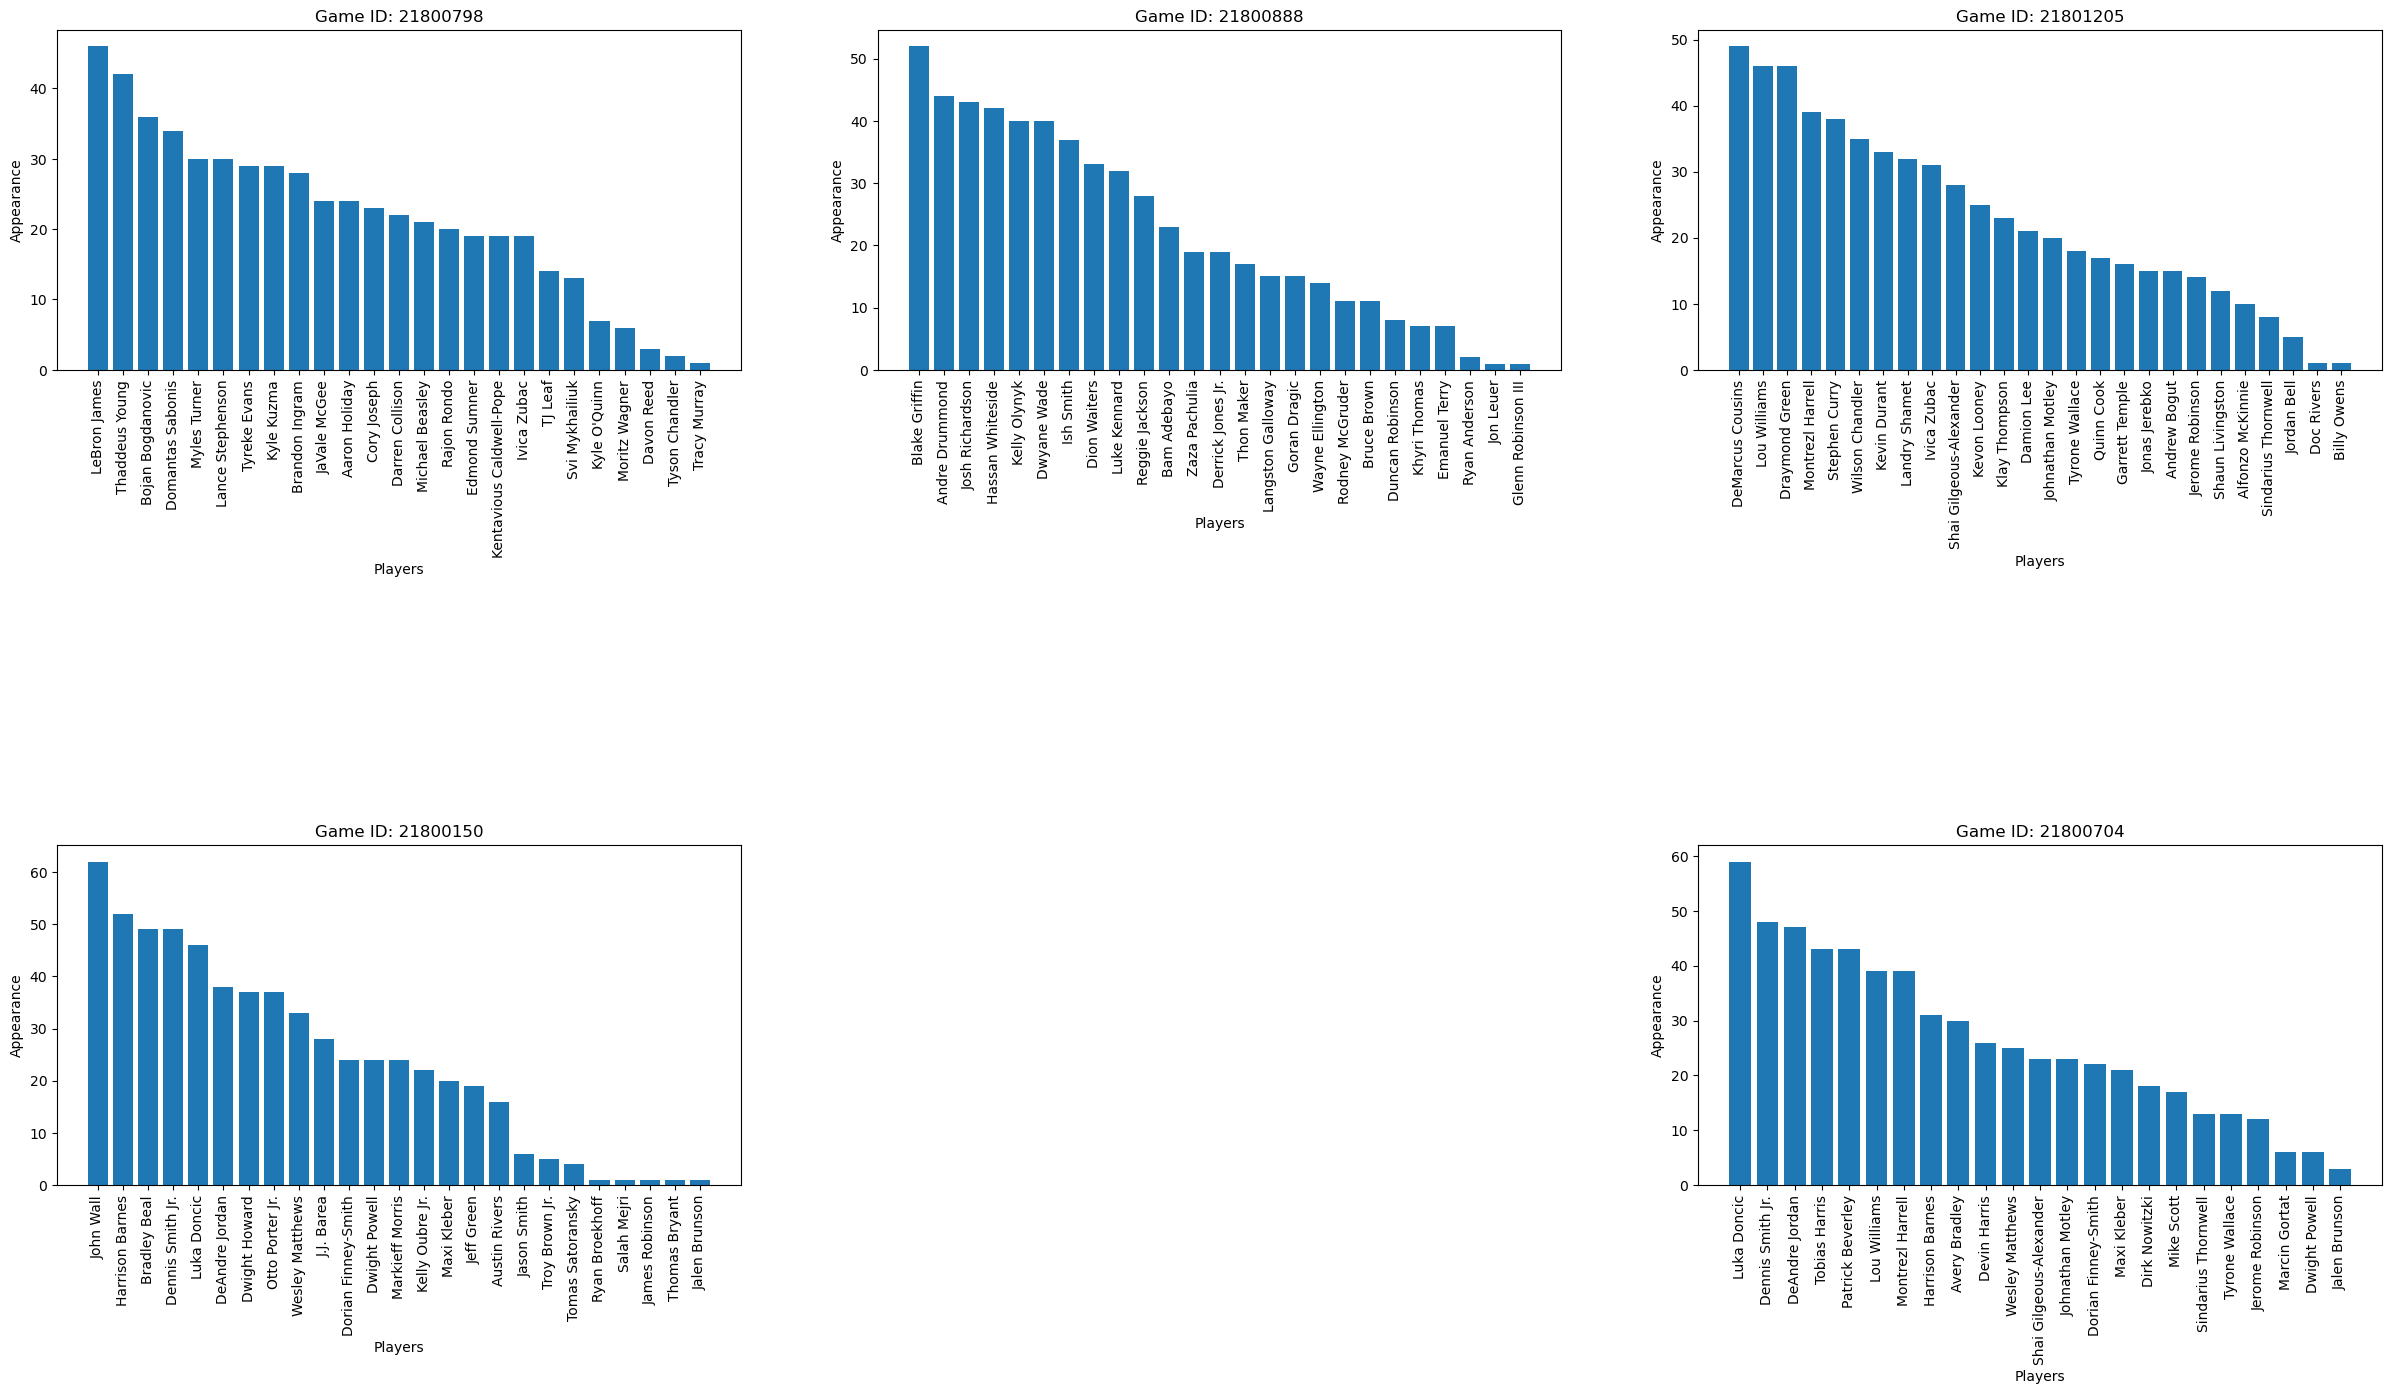

In [13]:
plt.figure(figsize = (30,15));
plotter(ids[0], 1)
plotter(ids[1], 2)
plotter(ids[2], 3)
plotter(ids[3], 7)
plotter(ids[4], 9)

In [14]:
#5
def pairplayer(id):
    res = nba_data[[set(t).issubset(total_appear(id)) for s,t in nba_data.transpose().items()]]
    plt.rcParams['figure.figsize'] = 8,8
    graph = nx.from_pandas_edgelist(pd.DataFrame(res))
    nx.draw_shell(graph,with_labels=True)

## Question 2

For this question we are going to use [a sample](https://raw.githubusercontent.com/arch-raven/spotify-recsys/main/spotify_million_playlist/dataset/data/mpd.slice.0-999.json) from [Spottify Million Playlist Dataset](https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge).

1. Ingest the data as a python dictionary using the [json](https://docs.python.org/3/library/json.html) library.
2. Construct a complete list of all artists appearing in the dictionary you obtained in step 1. Then using [`Counter`](https://docs.python.org/3/library/collections.html#collections.Counter) function count how many times each artist appears.
3. Filter out those artists that appear fewer than 100 times, and then sort the remaining from the most popular to least popular.
4. Plot the result you obtain from Step 3 as a bar chart.
5. Repeat Steps 2-4 for the Songs instead of Artists by filtering out the songs that appear 25 times or fewer.

In [27]:
#QUESTION 2
#1
url = "https://raw.githubusercontent.com/arch-raven/spotify-recsys/main/spotify_million_playlist/dataset/data/mpd.slice.0-999.json"
response = urlopen(url);
raw_spoti = json.loads(response.read());

In [28]:
playlists_overall = raw_spoti.get('playlists')

In [17]:
playlists_tracks = pd.json_normalize(playlists_overall)
playlists_tracks

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,Throwbacks,false,0,1493424000,52,47,1,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",6,11532414,37,NaN
1,Awesome Playlist,false,1,1506556800,39,23,1,"[{'pos': 0, 'artist_name': 'Survivor', 'track_...",5,11656470,21,NaN
2,korean,false,2,1505692800,64,51,1,"[{'pos': 0, 'artist_name': 'Hoody', 'track_uri...",18,14039958,31,NaN
3,mat,false,3,1501027200,126,107,1,"[{'pos': 0, 'artist_name': 'Camille Saint-Saën...",4,28926058,86,NaN
4,90s,false,4,1401667200,17,16,2,"[{'pos': 0, 'artist_name': 'The Smashing Pumpk...",7,4335282,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,old,false,995,1507852800,41,40,1,"[{'pos': 0, 'artist_name': 'Katrina', 'track_u...",8,9917901,36,NaN
996,Daze,false,996,1479254400,17,17,1,"[{'pos': 0, 'artist_name': 'PARTYNEXTDOOR', 't...",13,3699248,15,NaN
997,rap,false,997,1410307200,119,98,1,"[{'pos': 0, 'artist_name': 'LoveRance', 'track...",63,27538723,82,NaN
998,Country,false,998,1507939200,108,75,1,"[{'pos': 0, 'artist_name': 'Hunter Hayes', 'tr...",37,24950143,40,NaN


In [18]:
playlists_tracks['tracks']
allofthem = pd.json_normalize(playlists_tracks.tracks)
allofthem

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,"{'pos': 0, 'artist_name': 'Missy Elliott', 'tr...","{'pos': 1, 'artist_name': 'Britney Spears', 't...","{'pos': 2, 'artist_name': 'Beyoncé', 'track_ur...","{'pos': 3, 'artist_name': 'Justin Timberlake',...","{'pos': 4, 'artist_name': 'Shaggy', 'track_uri...","{'pos': 5, 'artist_name': 'Usher', 'track_uri'...","{'pos': 6, 'artist_name': 'Usher', 'track_uri'...","{'pos': 7, 'artist_name': 'The Pussycat Dolls'...","{'pos': 8, 'artist_name': 'Destiny's Child', '...","{'pos': 9, 'artist_name': 'OutKast', 'track_ur...",...,None,None,None,None,None,None,None,None,None,None
1,"{'pos': 0, 'artist_name': 'Survivor', 'track_u...","{'pos': 1, 'artist_name': 'Daniel Tidwell', 't...","{'pos': 2, 'artist_name': 'Daniel Tidwell', 't...","{'pos': 3, 'artist_name': 'Daniel Tidwell', 't...","{'pos': 4, 'artist_name': 'Daniel Tidwell', 't...","{'pos': 5, 'artist_name': 'Daniel Tidwell', 't...","{'pos': 6, 'artist_name': 'Daniel Tidwell', 't...","{'pos': 7, 'artist_name': 'Kaleptik', 'track_u...","{'pos': 8, 'artist_name': 'Ben Foster', 'track...","{'pos': 9, 'artist_name': 'Leslie Odom Jr.', '...",...,None,None,None,None,None,None,None,None,None,None
2,"{'pos': 0, 'artist_name': 'Hoody', 'track_uri'...","{'pos': 1, 'artist_name': 'Loco', 'track_uri':...","{'pos': 2, 'artist_name': 'Park Kyung', 'track...","{'pos': 3, 'artist_name': 'Park Kyung', 'track...","{'pos': 4, 'artist_name': 'BTS', 'track_uri': ...","{'pos': 5, 'artist_name': 'Lovelyz', 'track_ur...","{'pos': 6, 'artist_name': 'LEE HI', 'track_uri...","{'pos': 7, 'artist_name': 'LEE HI', 'track_uri...","{'pos': 8, 'artist_name': 'Ailee', 'track_uri'...","{'pos': 9, 'artist_name': 'Miso', 'track_uri':...",...,None,None,None,None,None,None,None,None,None,None
3,"{'pos': 0, 'artist_name': 'Camille Saint-Saëns...","{'pos': 1, 'artist_name': 'Camille Saint-Saëns...","{'pos': 2, 'artist_name': 'No Vacation', 'trac...","{'pos': 3, 'artist_name': 'No Vacation', 'trac...","{'pos': 4, 'artist_name': 'Banes World', 'trac...","{'pos': 5, 'artist_name': 'Banes World', 'trac...","{'pos': 6, 'artist_name': 'PWR BTTM', 'track_u...","{'pos': 7, 'artist_name': 'Tears For Fears', '...","{'pos': 8, 'artist_name': 'Natureboy', 'track_...","{'pos': 9, 'artist_name': 'Joy Again', 'track_...",...,None,None,None,None,None,None,None,None,None,None
4,"{'pos': 0, 'artist_name': 'The Smashing Pumpki...","{'pos': 1, 'artist_name': 'Oasis', 'track_uri'...","{'pos': 2, 'artist_name': 'Aerosmith', 'track_...","{'pos': 3, 'artist_name': 'Natalie Merchant', ...","{'pos': 4, 'artist_name': 'TLC', 'track_uri': ...","{'pos': 5, 'artist_name': 'The Smashing Pumpki...","{'pos': 6, 'artist_name': 'Natalie Imbruglia',...","{'pos': 7, 'artist_name': 'Lisa Loeb & Nine St...","{'pos': 8, 'artist_name': 'Toni Braxton', 'tra...","{'pos': 9, 'artist_name': 'Sarah McLachlan', '...",...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"{'pos': 0, 'artist_name': 'Katrina', 'track_ur...","{'pos': 1, 'artist_name': 'Nena', 'track_uri':...","{'pos': 2, 'artist_name': 'TLC', 'track_uri': ...","{'pos': 3, 'artist_name': 'TLC', 'track_uri': ...","{'pos': 4, 'artist_name': 'Nirvana', 'track_ur...","{'pos': 5, 'artist_name': 'Sister Sledge', 'tr...","{'pos': 6, 'artist_name': 'Spice Girls', 'trac...","{'pos': 7, 'artist_name': 'Electric Light Orch...","{'pos': 8, 'artist_name': 'Marvin Gaye', 'trac...","{'pos': 9, 'artist_name': 'Raspberries', 'trac...",...,None,None,None,None,None,None,None,None,None,None
996,"{'pos': 0, 'artist_name': 'PARTYNEXTDOOR', 'tr...","{'pos': 1, 'artist_name': 'DRAM', 'track_uri':...","{'pos': 2, 'artist_name': 'Rae Sremmurd', 'tra...","{'pos': 3, 'artist_name': 'Chance The Rapper',...","{'pos': 4, 'artist_name': 'Frank Ocean', 'trac...","{'pos': 5, 'artist_name': 'Aminé', 'track_uri'...","{'pos': 6, 'artist_name': 'Kehlani', 'track_ur...","{'pos': 7, 'artist_n

In [19]:
allofthem.columns

RangeIndex(start=0, stop=245, step=1)

In [20]:
artists_names = []
for i in range(len(allofthem.columns)):
    for j in range(len(allofthem)):
        a = allofthem[i][j]
        if type(a) == dict:
            artists_names.append(a.get('artist_name'))
        else:
            artists_names.append('none')  


artists_names

['Missy Elliott',
 'Survivor',
 'Hoody',
 'Camille Saint-Saëns',
 'The Smashing Pumpkins',
 'Cali Swag District',
 'Creedence Clearwater Revival',
 'Fink',
 'Catfish and the Bottlemen',
 'Willie Nelson',
 'Post Malone',
 'Natural Self',
 'Yael Naim',
 'Ruth B.',
 '311',
 'Sylvan Esso',
 'Young the Giant',
 'Hozier',
 'Big & Rich',
 'Band Of Skulls',
 'Lil Pump',
 'Mazzy Star',
 'SZA',
 'Avenged Sevenfold',
 'Twenty One Pilots',
 'ODESZA',
 'First Aid Kit',
 'Sturgill Simpson',
 'T.I.',
 'Lauv',
 'Will Butler',
 'Ellie Goulding',
 'Vance Joy',
 'Buena Vista Social Club',
 'Life of Dillon',
 'Smallpools',
 'Tokyo Police Club',
 'Desiigner',
 'Sean Kingston',
 'Luke Bryan',
 'Kanye West',
 'Sam Smith',
 'Jerrod Niemann',
 'Jason Aldean',
 'Taylor Swift',
 'The All-American Rejects',
 'NEEDTOBREATHE',
 'Michael Jackson',
 'Jason Aldean',
 'Kelly Price',
 'Fetty Wap',
 'Imagine Dragons',
 'Bing Crosby',
 'Sha Gotti',
 'Sean Jones',
 'Jason Aldean',
 'Ms. Lauryn Hill',
 'Nothing But Thieves'

In [21]:
track_names = []
for k in range(len(allofthem.columns)):
    for m in range(len(allofthem)):
        b = allofthem[k][m]
        if type(b) == dict:
            track_names.append(b.get('track_name'))
        else:
            track_names.append('none')  


track_names

['Lose Control (feat. Ciara & Fat Man Scoop)',
 'Eye of the Tiger',
 'Like You',
 'Danse macabre',
 'Tonight, Tonight',
 'Teach Me How to Dougie',
 'I Put A Spell On You',
 'Hard To See You Happy',
 'Twice',
 'Highwayman',
 'Big Lie',
 'In the morning - Version',
 'New Soul',
 'Lost Boy',
 'Down',
 'Coffee',
 'Repeat',
 'Jackie And Wilson',
 'Run Away with You',
 'Cold Fame',
 'Crazy',
 'Fade Into You',
 'Drew Barrymore',
 'Natural Born Killer',
 'Ride',
 'Say My Name (feat. Zyra) - Hermitude Remix',
 'Stay Gold',
 'Breakers Roar',
 'Whatever You Like',
 'I Like Me Better',
 'Take My Side',
 'On My Mind',
 'Mess Is Mine',
 'Chan Chan',
 'Overload - The Chainsmokers Remix',
 'Dreaming',
 'Be Good (RAC Remix)',
 'Panda',
 'Beautiful Girls',
 'Drink A Beer',
 'POWER',
 'Lay Me Down',
 "Shinin' On Me",
 'Amarillo Sky',
 'Safe & Sound - from The Hunger Games Soundtrack',
 'Dirty Little Secret',
 'Where The Money Is',
 'Billie Jean',
 "Burnin' It Down",
 'Tired',
 'Trap Queen',
 'Radioactive

In [22]:
howmanytimes_tracks = collections.Counter(track_names)
list(howmanytimes_tracks)

['Lose Control (feat. Ciara & Fat Man Scoop)',
 'Eye of the Tiger',
 'Like You',
 'Danse macabre',
 'Tonight, Tonight',
 'Teach Me How to Dougie',
 'I Put A Spell On You',
 'Hard To See You Happy',
 'Twice',
 'Highwayman',
 'Big Lie',
 'In the morning - Version',
 'New Soul',
 'Lost Boy',
 'Down',
 'Coffee',
 'Repeat',
 'Jackie And Wilson',
 'Run Away with You',
 'Cold Fame',
 'Crazy',
 'Fade Into You',
 'Drew Barrymore',
 'Natural Born Killer',
 'Ride',
 'Say My Name (feat. Zyra) - Hermitude Remix',
 'Stay Gold',
 'Breakers Roar',
 'Whatever You Like',
 'I Like Me Better',
 'Take My Side',
 'On My Mind',
 'Mess Is Mine',
 'Chan Chan',
 'Overload - The Chainsmokers Remix',
 'Dreaming',
 'Be Good (RAC Remix)',
 'Panda',
 'Beautiful Girls',
 'Drink A Beer',
 'POWER',
 'Lay Me Down',
 "Shinin' On Me",
 'Amarillo Sky',
 'Safe & Sound - from The Hunger Games Soundtrack',
 'Dirty Little Secret',
 'Where The Money Is',
 'Billie Jean',
 "Burnin' It Down",
 'Tired',
 'Trap Queen',
 'Radioactive

In [23]:
unpopulars_tracks = []
for item in howmanytimes_tracks:
    if howmanytimes_tracks[item] < 25:
        unpopulars_tracks.append((item, howmanytimes_tracks[item]))

unpopulars_tracks

[('Lose Control (feat. Ciara & Fat Man Scoop)', 6),
 ('Eye of the Tiger', 21),
 ('Like You', 6),
 ('Danse macabre', 1),
 ('Tonight, Tonight', 3),
 ('Teach Me How to Dougie', 7),
 ('I Put A Spell On You', 3),
 ('Hard To See You Happy', 1),
 ('Twice', 4),
 ('Highwayman', 3),
 ('Big Lie', 5),
 ('In the morning - Version', 1),
 ('New Soul', 3),
 ('Lost Boy', 13),
 ('Coffee', 8),
 ('Repeat', 1),
 ('Jackie And Wilson', 13),
 ('Run Away with You', 3),
 ('Cold Fame', 1),
 ('Fade Into You', 7),
 ('Drew Barrymore', 1),
 ('Natural Born Killer', 2),
 ('Say My Name (feat. Zyra) - Hermitude Remix', 2),
 ('Stay Gold', 1),
 ('Breakers Roar', 1),
 ('Whatever You Like', 20),
 ('I Like Me Better', 7),
 ('Take My Side', 1),
 ('On My Mind', 17),
 ('Mess Is Mine', 10),
 ('Chan Chan', 2),
 ('Overload - The Chainsmokers Remix', 2),
 ('Dreaming', 7),
 ('Be Good (RAC Remix)', 1),
 ('Beautiful Girls', 17),
 ('Drink A Beer', 7),
 ('POWER', 16),
 ('Lay Me Down', 22),
 ("Shinin' On Me", 2),
 ('Amarillo Sky', 2),
 (

In [31]:
sorted(unpopulars_tracks, key=lambda x: x[1], reverse = True)

[("I'm Yours", 24),
 ('XO', 24),
 ('Slide', 24),
 ('All of Me', 24),
 ('In Da Club', 24),
 ("I Don't Fuck With You", 24),
 ('Intro', 24),
 ('Rather Be (feat. Jess Glynne)', 24),
 ('All I Want', 24),
 ('Alright', 24),
 ('Lean On (feat. MØ & DJ Snake)', 24),
 ('Bodak Yellow', 24),
 ('Pony', 24),
 ('Slow Motion', 24),
 ('You', 24),
 ('Me, Myself & I', 23),
 ('Latch', 23),
 ('What Do You Mean?', 23),
 ('Pompeii', 23),
 ('No Hands (feat. Roscoe Dash and Wale) - Explicit Album Version', 23),
 ('White Christmas', 23),
 ("I Won't Give Up", 23),
 ('Slippery (feat. Gucci Mane)', 23),
 ('Talking Body', 23),
 ('Young Dumb & Broke', 23),
 ('Losin Control', 23),
 ('Hotel California - Remastered', 23),
 ('Unforgettable', 23),
 ('Feeling Myself', 23),
 ('Again', 23),
 ('pick up the phone', 23),
 ('Sorry Not Sorry', 23),
 ('Demons', 23),
 ('rockstar', 23),
 ("Jessie's Girl", 23),
 ('Come On Eileen', 23),
 ('Take Me To Church', 23),
 ('Lay Me Down', 22),
 ('Billie Jean', 22),
 ('Radioactive', 22),
 ('Tu

In [24]:
howmanytimes_artists = collections.Counter(artists_names)
list(howmanytimes_artists)

['Missy Elliott',
 'Survivor',
 'Hoody',
 'Camille Saint-Saëns',
 'The Smashing Pumpkins',
 'Cali Swag District',
 'Creedence Clearwater Revival',
 'Fink',
 'Catfish and the Bottlemen',
 'Willie Nelson',
 'Post Malone',
 'Natural Self',
 'Yael Naim',
 'Ruth B.',
 '311',
 'Sylvan Esso',
 'Young the Giant',
 'Hozier',
 'Big & Rich',
 'Band Of Skulls',
 'Lil Pump',
 'Mazzy Star',
 'SZA',
 'Avenged Sevenfold',
 'Twenty One Pilots',
 'ODESZA',
 'First Aid Kit',
 'Sturgill Simpson',
 'T.I.',
 'Lauv',
 'Will Butler',
 'Ellie Goulding',
 'Vance Joy',
 'Buena Vista Social Club',
 'Life of Dillon',
 'Smallpools',
 'Tokyo Police Club',
 'Desiigner',
 'Sean Kingston',
 'Luke Bryan',
 'Kanye West',
 'Sam Smith',
 'Jerrod Niemann',
 'Jason Aldean',
 'Taylor Swift',
 'The All-American Rejects',
 'NEEDTOBREATHE',
 'Michael Jackson',
 'Kelly Price',
 'Fetty Wap',
 'Imagine Dragons',
 'Bing Crosby',
 'Sha Gotti',
 'Sean Jones',
 'Ms. Lauryn Hill',
 'Nothing But Thieves',
 'Kevin Gates',
 'Victorious Cas

In [25]:
unpopulars_artists = [] 
for item in howmanytimes_artists:
    if howmanytimes_artists[item] < 100:
        unpopulars_artists.append((item, howmanytimes_artists[item]))

unpopulars_artists


[('Missy Elliott', 52),
 ('Survivor', 23),
 ('Hoody', 2),
 ('Camille Saint-Saëns', 2),
 ('The Smashing Pumpkins', 29),
 ('Cali Swag District', 7),
 ('Creedence Clearwater Revival', 74),
 ('Fink', 1),
 ('Catfish and the Bottlemen', 14),
 ('Willie Nelson', 33),
 ('Natural Self', 4),
 ('Yael Naim', 2),
 ('Ruth B.', 18),
 ('311', 37),
 ('Sylvan Esso', 16),
 ('Young the Giant', 29),
 ('Big & Rich', 23),
 ('Band Of Skulls', 2),
 ('Lil Pump', 30),
 ('Mazzy Star', 5),
 ('SZA', 34),
 ('Avenged Sevenfold', 49),
 ('ODESZA', 64),
 ('First Aid Kit', 8),
 ('Sturgill Simpson', 3),
 ('T.I.', 86),
 ('Lauv', 28),
 ('Will Butler', 1),
 ('Vance Joy', 74),
 ('Buena Vista Social Club', 15),
 ('Life of Dillon', 11),
 ('Smallpools', 11),
 ('Tokyo Police Club', 5),
 ('Desiigner', 60),
 ('Sean Kingston', 29),
 ('Sam Smith', 96),
 ('Jerrod Niemann', 11),
 ('Taylor Swift', 64),
 ('The All-American Rejects', 29),
 ('NEEDTOBREATHE', 41),
 ('Michael Jackson', 95),
 ('Kelly Price', 4),
 ('Bing Crosby', 44),
 ('Sha Go

In [30]:
sorted(unpopulars_artists, key=lambda x: x[1], reverse = True)

[('B.o.B', 98),
 ('Nickelback', 98),
 ('Sam Smith', 96),
 ('Eric Church', 96),
 ('Michael Jackson', 95),
 ('Meek Mill', 95),
 ('Young Thug', 94),
 ('Bryson Tiller', 94),
 ('Dierks Bentley', 94),
 ('Halsey', 93),
 ('David Guetta', 93),
 ('XXXTENTACION', 93),
 ('AC/DC', 93),
 ('Sam Hunt', 93),
 ('50 Cent', 92),
 ('Bon Iver', 92),
 ('Shawn Mendes', 92),
 ('Gucci Mane', 92),
 ('DJ Snake', 91),
 ('blackbear', 89),
 ('Britney Spears', 88),
 ('Avicii', 87),
 ('T.I.', 86),
 ('Ne-Yo', 86),
 ('Arctic Monkeys', 86),
 ('Red Hot Chili Peppers', 86),
 ('Pentatonix', 86),
 ('Tyga', 86),
 ('Kid Ink', 85),
 ('Fifth Harmony', 85),
 ('Paramore', 84),
 ('Carrie Underwood', 84),
 ('Toby Keith', 83),
 ('Demi Lovato', 83),
 ('Deftones', 83),
 ('Sufjan Stevens', 83),
 ('Tame Impala', 82),
 ('Lady Gaga', 82),
 ('Alicia Keys', 82),
 ('R. Kelly', 82),
 ('Led Zeppelin', 81),
 ("Guns N' Roses", 80),
 ('OutKast', 80),
 ('The Black Eyed Peas', 80),
 ('Billy Currington', 79),
 ('The Rolling Stones', 79),
 ('Mariah Ca

## Question 3

For this question we are going to use [Wordbank Data](https://data.worldbank.org/). I would suggest [wbgapi](https://pypi.org/project/wbgapi/) library.

1. Write a function that takes a country name and a list of indicators and returns a pandas data frame with the corresponding data.
2. Get the data for Turkey for the following indicators:
   * [Poverty headcount ratio at national poverty lines (SI.POV.NAHC)](https://data.worldbank.org/indicator/SI.POV.NAHC)
   * [Current health expenditure per capita (SH.XPD.CHEX.PC.CD)](https://data.worldbank.org/indicator/SH.XPD.CHEX.PC.CD)
   * [Labor force participation rate, female (% of female population ages 15+) (SL.TLF.CACT.FE.NE.ZS)](https://data.worldbank.org/indicator/SL.TLF.CACT.FE.NE.ZS)
   * [Mortality rate, under-5 (per 1,000 live births) (SH.DYN.MORT)](https://data.worldbank.org/indicator/SH.DYN.MORT)
   * [Literacy rate, adult female (% of females ages 15 and above) (SE.ADT.LITR.FE.ZS)](https://data.worldbank.org/indicator/SE.ADT.LITR.FE.ZS)
3. Write a function that draws a line plot for a given list of indicators against time (i.e. the x-axis will be the time) AFTER it drops the years where data is not available. Draw a line plot for Turkey for all of the indicators I listed above.
4. Write a function that takes two indicators `id1` and `id2` and does a scatter plot of `id1` against `id2` after it drops the years where data is not available for one of the indicators. Your plot must have labels on the x- and the y-axes to indicate which indicators were used. Then draw a scatter plot (10 in total) for every pair of indicators I listed above.